In [115]:
import matplotlib.pyplot as plt
import math

# coding: utf-8
import os

import numpy as np

from sklearn.metrics import log_loss, roc_auc_score



In [116]:
def customLogLoss(label,probs):
    if len(label) != len(probs):
        print("Length of Target and Length of Preds are not same")
    else:
        losses = []
        for yt,yp in zip(label,probs):
            first_part = yt * np.log(yp)
            second_part = (1-yt) * np.log(1-yp)
            merge = -1 * (first_part + second_part)
            losses.append(merge)
        return np.mean(losses), losses #Taking the mean or average of the losses


In [117]:
# 2 早期的模型预估、算auc和loss

p_preds= np.array([9.39544e-02, 3.49456e-03, 4.27617e-01, 9.29428e-01, 7.34379e-02,
       9.95642e-01, 2.02321e-01, 8.83602e-01, 8.59889e-03, 9.94537e-01,
       4.08396e-03, 9.85862e-01, 9.69985e-03, 9.86493e-01, 1.49970e-02,
       5.39389e-03, 2.85652e-01, 5.16369e-01, 9.97394e-01, 1.69999e-01,
       6.93269e-01, 2.47218e-02, 8.46192e-03, 9.40639e-01, 5.47594e-03,
       7.20316e-01, 1.96904e-01, 6.04460e-03, 1.27652e-03, 2.50615e-02,
       1.04249e-03, 2.32002e-02, 4.84057e-02, 7.22944e-01, 7.13539e-03,
       9.23157e-01, 4.52790e-03, 4.52790e-03, 9.33102e-03, 4.78805e-02,
       9.94378e-01, 7.95380e-01, 7.26488e-03, 9.68862e-03, 9.92834e-01,
       1.96680e-03, 4.51742e-02, 9.93958e-01, 5.43417e-01, 3.63564e-02,
       3.63564e-02, 3.63564e-02, 3.63564e-02, 9.27255e-03, 4.75259e-02,
       9.22138e-01, 8.74037e-01, 1.89838e-01, 1.63889e-02, 4.69320e-02,
       3.33932e-01, 9.96111e-01, 9.80574e-01, 7.15688e-02, 9.99064e-01,
       1.25748e-01, 1.00774e-01, 4.41492e-01, 3.18460e-02, 1.06456e-02,
       8.25824e-01, 2.98312e-03, 9.80641e-01, 1.10393e-01, 9.92491e-01,
       7.87663e-03, 4.27617e-01, 4.50355e-03, 8.22929e-01, 9.42071e-01,
       1.29613e-01, 4.11707e-01, 9.89518e-01, 4.27617e-01, 2.64685e-02,
       3.65988e-02, 4.42355e-02, 7.70391e-01, 8.06329e-03, 2.00521e-02,
       6.38263e-02, 9.90367e-01, 2.84450e-02, 8.91830e-01, 1.55454e-02,
       1.39488e-02, 1.60560e-03, 8.81529e-01, 8.98980e-01, 9.97833e-01,
       9.74536e-04, 7.46639e-01, 7.73132e-01, 9.75346e-01, 4.65564e-02,
       7.42644e-04, 8.07756e-01, 9.81691e-01, 2.46457e-02, 9.90955e-01,
       9.92318e-01, 4.99282e-02, 9.98392e-01, 8.63946e-01, 9.59491e-01,
       2.21888e-02, 1.36062e-02, 9.91455e-01, 9.91396e-01, 1.72709e-01,
       9.84305e-01, 3.47126e-03, 1.04949e-03, 2.16792e-02, 9.97272e-01,
       1.24412e-01, 9.95905e-01, 1.45326e-01, 1.45326e-01, 1.40716e-02,
       7.58795e-01, 1.88063e-01, 6.48832e-03, 3.79314e-02, 2.07967e-02,
       1.90532e-03, 3.06976e-03, 1.14205e-02, 9.48995e-04, 1.18066e-02,
       8.50387e-01, 9.82861e-01, 3.43137e-01, 9.96603e-01, 4.81921e-03,
       2.08616e-03, 9.77038e-01, 9.30189e-01, 3.84304e-01, 4.15523e-01,
       4.58192e-01, 2.37468e-03, 9.80333e-01, 9.94698e-01, 8.23758e-01,
       5.44165e-02, 7.05361e-03, 5.06534e-01, 9.82065e-01, 9.21304e-01,
       8.43895e-01, 1.39698e-03, 2.14157e-02, 9.85977e-01, 1.38934e-02,
       1.05054e-01, 3.86546e-01, 4.98307e-01, 9.97993e-01, 1.14721e-02,
       2.03184e-01, 4.52863e-02, 3.26876e-01, 4.79006e-01, 9.49180e-03,
       9.50179e-01, 1.20603e-02, 4.76269e-02, 1.94624e-03, 4.27617e-01,
       3.84012e-03, 2.10910e-02, 1.44143e-02, 8.36678e-01, 7.79089e-01,
       1.10477e-01, 1.97947e-01, 9.89546e-01, 1.47876e-03, 1.29736e-01,
       1.29736e-01, 8.84859e-01, 9.98149e-01, 4.27617e-01, 3.03461e-01,
       1.08431e-01, 3.15740e-02, 2.54670e-03, 2.23008e-02, 3.57047e-03,
       4.27617e-01, 9.96631e-01, 9.97170e-01, 9.97760e-01, 9.95420e-01,
       9.68336e-01, 4.07001e-03, 6.03088e-01, 6.03088e-01, 4.05848e-03,
       3.15253e-02, 2.04542e-03, 9.84616e-01, 9.85907e-01, 1.41033e-02,
       8.17717e-02, 1.36776e-01, 4.61623e-03, 1.52934e-02, 6.44475e-03,
       9.69179e-01, 1.65670e-02, 4.52965e-03, 8.35900e-01, 1.64592e-03,
       9.84646e-01, 5.63285e-03, 1.54480e-02, 4.86521e-02, 9.52582e-01,
       7.09105e-01, 9.91606e-01, 5.97089e-01, 2.84526e-02, 1.98541e-01,
       3.90562e-01, 2.54869e-03, 4.82193e-03, 5.10906e-01, 2.71315e-02,
       4.27617e-01, 7.03016e-02, 1.30182e-01, 4.83509e-01, 5.68235e-03,
       9.71232e-01, 6.69074e-03, 9.97847e-01, 7.29093e-03, 9.40159e-03,
       9.86606e-01, 9.87725e-01, 2.21834e-03, 6.96368e-01, 9.05199e-01,
       9.11914e-02, 3.05822e-03, 6.68482e-02, 1.47860e-02, 3.52380e-02,
       3.19107e-01, 5.21157e-02, 1.62884e-01, 7.34585e-02, 9.93714e-01,
       3.65415e-03, 2.77764e-01, 9.50270e-01, 9.68764e-01, 9.80145e-01,
       6.55109e-03, 4.49858e-02, 2.07676e-02, 9.76877e-01, 9.31685e-01,
       5.15441e-01, 4.20582e-03, 1.17090e-01, 2.08098e-03, 1.60148e-02,
       9.89542e-01, 9.99059e-01, 9.93169e-01, 9.24978e-03, 8.01641e-03,
       2.95207e-02, 8.15312e-01, 9.34528e-02, 4.27617e-01, 1.79534e-02,
       1.58215e-02, 9.89227e-01, 1.65078e-03, 8.77217e-01, 6.99255e-01,
       9.94993e-01, 6.13807e-01, 6.75866e-02, 2.23902e-02, 9.30028e-01,
       2.24025e-02, 1.01571e-01, 7.04655e-02, 1.32485e-02, 9.44930e-01,
       9.87663e-01, 1.31479e-03, 6.54101e-03, 1.28021e-02, 2.10148e-03,
       2.00463e-01, 9.74363e-01, 4.37862e-03, 5.51727e-03, 9.72591e-01,
       6.66918e-01, 4.27617e-01, 9.06062e-01, 4.50146e-01, 9.25382e-01,
       1.38761e-02, 2.01058e-03, 8.15165e-01, 7.56237e-02, 4.27617e-01,
       2.27324e-01, 1.29167e-02, 9.72441e-01, 9.85179e-01, 9.99497e-01,
       1.48717e-02, 9.29893e-01, 8.99280e-01, 7.25157e-01, 9.88914e-01,
       9.92863e-01, 9.94744e-01, 4.88407e-02, 7.29010e-03, 9.61355e-02,
       8.29686e-01, 5.08928e-01, 8.37039e-01, 1.45142e-01, 7.83238e-01,
       9.89756e-01, 1.03353e-01, 9.42682e-01, 5.71510e-02, 7.00355e-01,
       2.00104e-02, 9.97269e-01, 9.41473e-02, 9.52482e-01, 1.16529e-01,
       3.41183e-03, 3.41183e-03, 3.41183e-03, 3.41183e-03, 3.41183e-03,
       3.09930e-01, 1.02692e-01, 4.27617e-01, 1.10820e-03, 1.19586e-02,
       1.03295e-03, 9.91683e-01, 1.09159e-01, 7.22111e-01, 3.17583e-01,
       9.84208e-01, 2.44899e-01, 6.31137e-01, 1.02922e-01, 2.74805e-02,
       6.64998e-01, 1.66529e-02, 3.15800e-03, 3.15800e-03, 3.15800e-03,
       3.15800e-03, 1.84406e-02, 4.55586e-02, 1.09470e-02, 1.35216e-01,
       9.35419e-01, 2.02715e-03, 2.59422e-02, 9.89199e-01, 9.39544e-02,
       3.70964e-02, 9.88597e-01, 7.71511e-01, 7.33881e-01, 7.25192e-01,
       2.50254e-02, 7.96530e-03, 1.28269e-01, 6.28389e-02, 4.83132e-02,
       7.45001e-01, 9.52774e-01, 1.09667e-02, 9.68278e-01, 3.43956e-02,
       9.75027e-01, 1.96442e-03, 3.25050e-02, 8.82746e-01, 5.55995e-03,
       1.73619e-01, 9.96410e-01, 4.45724e-01, 8.73390e-03, 8.82270e-02,
       9.42422e-01, 9.84230e-01, 3.00711e-03, 9.67529e-01, 7.80731e-04,
       2.17489e-02, 2.17489e-02, 1.57193e-01, 9.41478e-01, 2.11178e-01,
       2.11178e-01, 7.49889e-01, 4.89884e-01, 5.15611e-01, 1.98978e-01,
       8.31430e-01, 5.91105e-03, 6.52153e-01, 9.98668e-01, 3.92068e-02,
       1.24599e-02, 1.41982e-02, 2.62056e-02, 5.34941e-01, 9.82744e-01,
       3.60236e-01, 1.94586e-01, 4.49396e-02, 3.89200e-03, 1.20875e-03,
       5.75522e-03, 4.20998e-01, 1.21588e-03, 7.95628e-01, 9.62090e-01,
       7.29415e-03, 3.70870e-02, 1.03463e-01, 5.34913e-01, 5.84516e-02,
       1.74713e-03, 1.32972e-03, 7.07757e-03, 3.46480e-02, 4.27617e-01,
       8.88530e-01, 1.32647e-03, 9.03826e-01, 1.38107e-02, 9.37715e-01,
       9.58238e-01, 7.99093e-02, 2.82229e-02, 1.86202e-03, 4.80464e-03,
       1.96236e-03, 7.34523e-01, 9.97251e-01, 4.27617e-01, 4.27617e-01,
       8.80003e-01, 8.19805e-03, 9.97060e-01, 9.58003e-01, 1.87444e-02,
       7.97413e-01, 9.97739e-01, 5.68020e-03, 9.97489e-01, 1.47287e-01,
       9.86099e-04, 9.89129e-01, 6.45708e-02, 1.27709e-02, 1.69513e-03,
       1.11439e-02, 2.90914e-02, 9.93569e-01, 5.01195e-01, 9.89534e-01,
       9.93194e-01, 2.08661e-03, 2.26930e-03, 1.14721e-02, 6.25488e-03,
       1.68407e-03, 8.88440e-01, 7.69609e-03, 7.69609e-03, 9.65159e-01,
       4.02193e-02, 9.97792e-01, 1.00917e-03, 7.56934e-01, 1.13657e-03,
       1.50205e-01, 3.71665e-03, 7.19973e-03, 1.56747e-01, 5.24995e-03,
       1.59713e-01, 1.59713e-01, 4.54112e-02, 6.86669e-03, 6.86669e-03,
       9.79227e-01, 2.23581e-02, 4.99985e-03, 7.63704e-01, 9.74755e-01,
       4.27617e-01, 2.75963e-01, 9.08987e-01, 1.05836e-01, 5.87699e-03,
       9.82628e-01, 2.33668e-01, 9.91719e-01, 6.15602e-02, 4.27617e-01,
       4.54365e-02, 9.67135e-01, 9.96869e-01, 2.24930e-03, 7.63395e-01,
       4.02661e-02, 1.55431e-03, 4.83204e-01, 9.86085e-01, 9.98366e-01,
       9.81162e-01, 3.00711e-03, 3.03168e-01, 1.30964e-01, 9.75719e-01,
       5.48194e-01, 2.90140e-02, 3.68902e-03, 2.09180e-02, 1.16039e-02,
       2.57625e-02, 2.02544e-02, 1.57503e-01, 9.61006e-04, 6.58243e-02,
       5.11846e-01, 9.00562e-01, 6.36738e-02, 9.47275e-01, 2.82681e-03,
       1.22451e-01, 1.22451e-01, 1.80718e-02, 2.69884e-01, 1.28039e-02,
       5.42569e-01, 9.97275e-01, 9.56161e-01, 4.94081e-01], dtype=np.float32)

p_auc = roc_auc_score(labels, p_preds)
p_loss = log_loss(labels, p_preds)
pos_pred = [p for l, p in zip(labels, p_preds) if l]
pos_pred_avg = sum(pos_pred)/len(pos_pred)
pos_label = np.ones_like(pos_pred)

# p_pos_loss = log_loss(pos_label, pos_pred)
p_pos_loss= -np.log(pos_pred).mean()
p_pos_loss_list = -np.log(pos_pred)

neg_pred = [p for l, p in zip(labels, p_preds) if not l]
neg_pred_avg = sum(neg_pred) / len(neg_pred)
neg_label = np.zeros_like(neg_pred)

# p_neg_loss = log_loss(neg_label, neg_pred)
p_neg_loss, p_neg_loss_list = customLogLoss(neg_label, neg_pred)

# previous: auc:0.9653046185312739 loss:0.2846093033825758 positive_loss:0.19518650283202563 negative_loss:0.33119838295989845
print(f'previous: auc:{p_auc} loss:{p_loss} positive_loss:{p_pos_loss} negative_loss:{p_neg_loss} pos_pred_avg:{pos_pred_avg} neg_p_avg:{neg_pred_avg}')

previous: auc:0.9653046185312739 loss:0.28460932549154905 positive_loss:0.1791744828224182 negative_loss:0.3257110407763775 pos_pred_avg:0.8993332088861313 neg_p_avg:0.17637488881244998


In [118]:
# 3 后期的模型预估、算auc和loss

l_preds = np.array([3.41624e-04, 8.22544e-05, 8.79043e-03, 9.99430e-01, 3.69960e-03,
       9.99983e-01, 2.77230e-03, 9.98186e-01, 9.73642e-05, 9.99811e-01,
       3.26991e-04, 9.99874e-01, 1.68443e-04, 9.99898e-01, 3.81768e-04,
       3.40521e-04, 2.66576e-02, 4.90173e-01, 9.99990e-01, 2.23059e-01,
       9.88844e-01, 9.12890e-03, 4.17501e-04, 9.97842e-01, 6.68764e-05,
       9.93526e-01, 1.85202e-02, 1.34289e-04, 1.17689e-04, 4.84407e-04,
       1.03951e-04, 5.78642e-04, 1.82003e-04, 8.69215e-01, 2.31382e-03,
       9.78632e-01, 8.10921e-05, 8.10921e-05, 5.69969e-04, 1.25599e-03,
       9.99844e-01, 9.62301e-01, 1.85698e-04, 2.08944e-04, 9.99858e-01,
       7.83205e-05, 4.45098e-04, 9.99997e-01, 3.40352e-02, 4.31031e-04,
       4.31031e-04, 4.31031e-04, 4.31031e-04, 1.07884e-04, 8.04126e-04,
       9.98776e-01, 9.96406e-01, 2.61421e-02, 1.23391e-03, 6.87212e-04,
       5.05298e-04, 9.99975e-01, 9.99706e-01, 3.11315e-04, 9.99998e-01,
       6.46982e-03, 1.72830e-03, 8.47230e-01, 5.34773e-04, 2.84910e-04,
       9.92969e-01, 1.64270e-04, 9.99969e-01, 5.62795e-02, 9.99984e-01,
       1.25617e-04, 8.79043e-03, 4.57466e-05, 9.96573e-01, 9.99160e-01,
       5.21578e-02, 1.56218e-03, 9.99971e-01, 8.79043e-03, 1.55956e-04,
       1.68592e-04, 2.51830e-04, 9.95618e-01, 3.91901e-05, 8.52644e-05,
       2.17059e-03, 9.99963e-01, 6.11842e-05, 9.99228e-01, 1.45194e-03,
       5.48363e-05, 5.34356e-05, 9.93501e-01, 9.75343e-01, 9.99999e-01,
       6.74129e-05, 4.55860e-01, 9.84980e-01, 9.99896e-01, 3.58760e-04,
       2.12371e-04, 9.91262e-01, 9.99750e-01, 1.06573e-04, 9.99863e-01,
       9.99991e-01, 3.16948e-04, 9.99999e-01, 9.88418e-01, 9.99709e-01,
       9.67383e-05, 3.70324e-04, 9.99994e-01, 9.99997e-01, 1.76629e-03,
       9.99830e-01, 1.23182e-03, 1.07828e-03, 2.35617e-04, 9.99993e-01,
       2.67021e-02, 9.99911e-01, 8.00337e-02, 8.00337e-02, 6.94394e-05,
       9.96483e-01, 4.68097e-02, 1.74195e-04, 6.86049e-05, 1.82271e-04,
       6.59823e-05, 2.04861e-04, 2.34574e-04, 1.00434e-04, 1.36435e-03,
       9.95793e-01, 9.99751e-01, 7.03678e-03, 9.99999e-01, 1.22249e-04,
       8.20160e-05, 9.99658e-01, 9.96652e-01, 8.41154e-01, 7.01189e-04,
       5.90310e-03, 1.24276e-04, 9.99925e-01, 9.99968e-01, 9.99130e-01,
       2.61426e-04, 6.17296e-04, 2.02832e-03, 9.99934e-01, 9.99896e-01,
       9.50746e-01, 6.88523e-04, 1.74850e-04, 9.99556e-01, 7.28369e-05,
       3.54576e-03, 1.11875e-01, 4.62928e-02, 9.99999e-01, 1.58221e-04,
       6.58077e-03, 1.07744e-02, 3.88654e-01, 8.31240e-01, 4.56870e-05,
       9.99954e-01, 5.92649e-04, 5.03778e-04, 2.71738e-04, 8.79043e-03,
       4.22597e-05, 3.38584e-04, 5.83678e-04, 9.96916e-01, 9.95708e-01,
       1.24538e-03, 2.67783e-03, 9.99973e-01, 9.31025e-05, 1.08421e-04,
       1.08421e-04, 9.96541e-01, 9.99991e-01, 8.79043e-03, 9.39402e-03,
       6.69181e-04, 1.58876e-04, 4.41670e-05, 6.72787e-04, 2.00063e-04,
       8.79043e-03, 9.99998e-01, 9.99869e-01, 9.99999e-01, 9.99998e-01,
       9.98975e-01, 3.26961e-04, 8.86875e-01, 8.86875e-01, 4.08590e-05,
       2.54354e-03, 1.14858e-04, 9.99883e-01, 9.99982e-01, 9.05693e-04,
       2.10047e-04, 5.99384e-04, 5.48989e-04, 4.61549e-04, 2.48969e-04,
       9.99924e-01, 1.41665e-03, 2.34783e-04, 8.90623e-01, 1.62125e-04,
       9.99994e-01, 1.81466e-04, 1.67459e-04, 1.92764e-03, 9.99843e-01,
       7.77407e-01, 9.99976e-01, 9.07083e-01, 3.27140e-04, 3.64942e-01,
       8.03557e-03, 2.20537e-04, 8.23140e-05, 9.13099e-02, 8.65072e-04,
       8.79043e-03, 2.41974e-03, 6.56464e-01, 1.17147e-01, 1.17570e-04,
       9.98099e-01, 5.24223e-05, 9.99998e-01, 7.21216e-05, 2.57701e-04,
       9.99981e-01, 9.99994e-01, 1.11669e-04, 6.06603e-01, 9.98455e-01,
       3.96669e-04, 4.50075e-04, 8.15195e-03, 1.12593e-04, 7.99358e-04,
       5.82003e-02, 3.55989e-03, 4.27693e-04, 4.47956e-03, 9.99998e-01,
       3.98159e-05, 6.63996e-04, 9.99804e-01, 9.98418e-01, 9.99917e-01,
       8.48472e-05, 1.50880e-03, 7.26104e-04, 9.99977e-01, 9.99766e-01,
       9.24809e-01, 1.40518e-04, 1.08665e-03, 5.90682e-05, 3.93331e-04,
       9.99927e-01, 9.99998e-01, 9.99995e-01, 4.91142e-05, 3.22908e-04,
       9.70127e-01, 9.90209e-01, 1.43012e-03, 8.79043e-03, 3.13133e-04,
       1.21716e-03, 9.99325e-01, 2.05159e-04, 9.98693e-01, 8.07670e-01,
       9.99998e-01, 9.96448e-01, 5.26649e-03, 6.67495e-03, 9.99867e-01,
       6.11842e-05, 6.64771e-04, 5.30005e-04, 2.73556e-04, 9.98648e-01,
       9.99914e-01, 5.47469e-05, 9.86457e-05, 6.20186e-05, 5.29289e-05,
       9.40859e-04, 9.99809e-01, 1.78188e-04, 2.81423e-04, 9.99839e-01,
       9.89053e-01, 8.79043e-03, 9.99840e-01, 9.81631e-01, 9.99009e-01,
       3.13699e-04, 1.04696e-04, 9.86322e-01, 2.53513e-03, 8.79043e-03,
       4.75973e-04, 1.47215e-03, 9.99938e-01, 9.99989e-01, 1.00000e+00,
       2.88546e-04, 9.74032e-01, 9.98351e-01, 9.50373e-01, 9.99750e-01,
       9.99869e-01, 9.99992e-01, 3.50684e-04, 1.05828e-04, 2.62618e-04,
       9.96921e-01, 9.83079e-01, 9.98974e-01, 7.13378e-04, 9.82119e-01,
       9.99972e-01, 6.05941e-04, 9.97238e-01, 6.22034e-04, 5.62671e-01,
       5.69016e-04, 9.99994e-01, 3.21266e-03, 9.98517e-01, 5.30418e-02,
       4.00156e-04, 4.00156e-04, 4.00156e-04, 4.00156e-04, 4.00156e-04,
       3.24860e-03, 1.49539e-02, 8.79043e-03, 1.31130e-04, 1.52797e-04,
       9.95100e-05, 9.99991e-01, 1.34395e-02, 7.88332e-01, 2.99543e-03,
       9.99893e-01, 9.96277e-01, 5.24119e-03, 1.13085e-01, 5.32657e-04,
       9.79336e-01, 6.62506e-05, 1.19507e-04, 1.19507e-04, 1.19507e-04,
       1.19507e-04, 1.25542e-03, 4.79895e-03, 1.87427e-04, 1.37594e-02,
       9.92764e-01, 9.93013e-05, 1.75506e-04, 9.99935e-01, 3.41624e-04,
       6.78897e-05, 9.99981e-01, 6.92987e-01, 9.92929e-01, 8.94349e-01,
       1.68324e-04, 7.90358e-05, 1.53354e-03, 4.31091e-04, 2.19792e-04,
       9.98390e-01, 9.99972e-01, 3.77595e-05, 9.99151e-01, 7.75099e-04,
       9.99958e-01, 8.34465e-05, 8.50111e-04, 9.99766e-01, 1.36197e-04,
       2.92689e-04, 9.99968e-01, 3.23319e-03, 4.82798e-05, 1.41904e-03,
       9.99887e-01, 9.99834e-01, 1.32561e-04, 9.99882e-01, 1.38730e-04,
       1.41919e-04, 1.41919e-04, 1.15266e-03, 9.99596e-01, 5.91499e-03,
       5.91499e-03, 7.58582e-01, 3.46349e-02, 9.71467e-01, 1.33359e-03,
       9.99734e-01, 2.09183e-04, 6.51787e-02, 9.99998e-01, 8.44032e-04,
       1.51753e-04, 2.80738e-04, 1.85468e-02, 1.10906e-03, 9.99904e-01,
       2.16910e-02, 1.13651e-03, 1.97083e-04, 1.40518e-04, 2.62320e-04,
       2.80887e-04, 6.32392e-01, 1.46091e-04, 9.98458e-01, 9.99192e-01,
       3.06398e-04, 1.30865e-03, 2.95162e-04, 1.83885e-01, 7.31587e-04,
       4.66943e-04, 9.19700e-05, 8.84622e-04, 1.34826e-04, 8.79043e-03,
       9.99368e-01, 1.50621e-04, 9.97269e-01, 3.45320e-04, 9.99538e-01,
       9.97504e-01, 1.38056e-02, 2.34723e-04, 8.83937e-05, 1.89811e-04,
       1.87695e-04, 9.98573e-01, 9.99998e-01, 8.79043e-03, 8.79043e-03,
       9.94351e-01, 9.64105e-05, 9.99998e-01, 9.99762e-01, 1.19281e-03,
       9.91246e-01, 9.99996e-01, 2.41518e-04, 9.99983e-01, 9.13620e-03,
       7.34925e-05, 9.99994e-01, 6.04749e-04, 1.31482e-03, 1.59264e-04,
       1.41114e-04, 1.60217e-04, 9.99995e-01, 9.20751e-01, 9.99992e-01,
       9.99925e-01, 1.13010e-04, 5.62966e-05, 1.58221e-04, 6.72638e-05,
       9.53078e-05, 8.09154e-01, 1.69754e-04, 1.69754e-04, 9.99349e-01,
       4.73797e-04, 9.99985e-01, 1.18461e-03, 8.87363e-01, 2.23845e-04,
       5.70218e-02, 5.49823e-04, 9.22382e-05, 2.23669e-03, 3.86387e-04,
       1.81714e-03, 1.81714e-03, 9.80705e-04, 3.15905e-05, 3.15905e-05,
       9.96246e-01, 5.07683e-04, 1.88828e-04, 9.97940e-01, 9.99837e-01,
       8.79043e-03, 1.29534e-01, 9.95970e-01, 6.35308e-03, 3.08126e-04,
       9.99833e-01, 6.25411e-03, 9.99982e-01, 1.10799e-03, 8.79043e-03,
       3.21284e-03, 9.99808e-01, 9.99992e-01, 1.06305e-04, 1.52723e-01,
       8.91685e-05, 1.79380e-04, 1.34439e-02, 9.99710e-01, 9.99999e-01,
       9.98916e-01, 1.32561e-04, 8.85695e-04, 6.20633e-04, 9.99842e-01,
       6.46468e-02, 2.81841e-04, 1.04308e-03, 2.61635e-04, 2.00292e-02,
       1.08224e-03, 5.37613e-03, 1.43234e-02, 5.23925e-05, 4.02987e-04,
       9.30335e-01, 9.99806e-01, 4.57874e-03, 9.95754e-01, 5.42134e-04,
       1.05089e-03, 1.05089e-03, 3.18915e-04, 6.58602e-04, 1.14501e-04,
       9.97020e-01, 9.99988e-01, 9.96310e-01, 2.33599e-02], dtype=np.float32)


l_auc = roc_auc_score(labels, l_preds)
l_loss = log_loss(labels, l_preds)

l_pos_pred = [p for l, p in zip(labels, l_preds) if l]
l_pos_pred_avg = sum(l_pos_pred) / len(l_pos_pred)
# l_pos_loss = log_loss(pos_label, l_pos_pred)
l_pos_loss = -np.log(l_pos_pred).mean()
l_pos_loss_list = -np.log(l_pos_pred)

l_neg_pred = [p for l, p in zip(labels, l_preds) if not l]
l_neg_pred_avg = sum(l_neg_pred) / len(l_neg_pred)

l_neg_loss, l_neg_loss_list = customLogLoss(neg_label, l_neg_pred)


# later: auc:0.9702976253139428 loss:0.4576302371560151 positive_loss:0.2963061741256704 negative_loss:0.5579310885523998
print(f'later: auc:{l_auc} loss:{l_loss} positive_loss:{l_pos_loss} negative_loss:{l_neg_loss} pos_pred_avg:{l_pos_pred_avg} neg_p_avg:{l_neg_pred_avg}')

later: auc:0.9703051449024709 loss:nan positive_loss:0.24991102516651154 negative_loss:0.538613230876595 pos_pred_avg:0.9532154522106263 neg_p_avg:0.12546790380295447


/data2/root/anaconda3/envs/py36-tf13-gpu/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2283: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/data2/root/anaconda3/envs/py36-tf13-gpu/lib/python3.6/site-packages/sklearn/metrics/_classification.py:2283: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


# 正例

In [134]:
len(p_pos_loss_list)

161

In [119]:
compare_arr = p_pos_loss_list < l_pos_loss_list

In [133]:
p_pos_loss_list[compare_arr]

array([1.66158, 2.6371 , 2.20371, 1.67098, 2.91109, 4.26135, 1.61456,
       0.11829], dtype=float32)

In [136]:
l_pos_loss_list[compare_arr]

array([3.64421, 8.07471, 2.87742, 3.06166, 8.24936, 7.00681, 6.61988,
       0.21177], dtype=float32)

In [137]:
l_pos_loss_list[compare_arr]-p_pos_loss_list[compare_arr]

array([1.98262, 5.43761, 0.67372, 1.39069, 5.33827, 2.74546, 5.00532,
       0.09348], dtype=float32)

In [120]:
p_pos_loss_list[~compare_arr].mean()

0.07691792

In [121]:
l_pos_loss_list[~compare_arr].mean()

0.0032016751

In [122]:
p_pos_loss_list.mean(), l_pos_loss_list.mean()

(0.17917448, 0.24991103)

(array([154.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   2.,   2.]),
 array([0.     , 0.82494, 1.64987, 2.47481, 3.29974, 4.12468, 4.94962,
        5.77455, 6.59949, 7.42442, 8.24936], dtype=float32),
 <BarContainer object of 10 artists>)

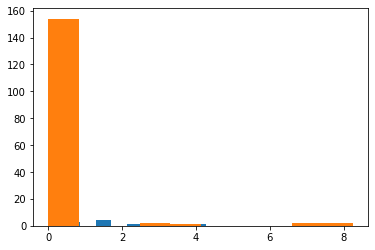

In [123]:
plt.hist(p_pos_loss_list)


plt.hist(l_pos_loss_list)

# 负例

In [135]:
len(p_neg_loss_list)

413

In [124]:
p_neg_loss_list = np.array(p_neg_loss_list)
l_neg_loss_list = np.array(l_neg_loss_list)

In [125]:
neg_compare_arr = p_neg_loss_list < l_neg_loss_list

In [126]:
l_neg_loss_list[neg_compare_arr]

array([2.52391e-01, 4.49578e+00, 2.03420e+00, 5.67606e+00, 5.43025e+00,
       3.70269e+00, 4.19837e+00, 1.07886e-03, 8.29794e+00, 5.69939e+00,
       1.83982e+00, 7.71970e+00, 4.92092e-01, 1.77928e+00, 5.78153e+00,
       2.17926e+00, 2.17926e+00, 2.21295e+00, 1.50241e+00, 2.37605e+00,
       4.54039e-01, 1.06846e+00, 6.47272e+00, 2.58772e+00, 9.52484e+00,
       3.51080e+00, 1.64854e+00, 4.51469e+00, 3.99709e+00, 6.91681e+00,
       4.29197e+00, 3.00322e+00, 5.78315e+00, 4.07920e+00, 6.88211e+00,
       5.89179e+00, 6.51367e+00, 1.55274e+00, 1.20006e-01, 4.92869e+00,
       2.24761e+00, 7.07144e+00, 8.36016e+00, 1.42123e+00, 3.55669e+00,
       1.00074e+00, 6.47469e+00, 7.12095e+00, 2.53516e+00, 1.18531e-03,
       2.18359e+00, 5.58493e+00, 8.72165e+00, 5.51399e+00, 2.02325e-02,
       2.66406e+00])

In [127]:
p_neg_loss_list[neg_compare_arr]

array([1.86328e-01, 1.18178e+00, 1.28354e+00, 1.73120e+00, 1.47138e+00,
       2.29244e+00, 1.48339e+00, 1.05004e-03, 4.06640e+00, 2.66196e+00,
       4.85002e-01, 4.26706e+00, 3.95826e-01, 6.52017e-01, 1.81203e+00,
       9.24041e-01, 9.24041e-01, 1.80728e+00, 1.23479e+00, 9.09040e-01,
       2.21321e-01, 1.39471e-01, 2.35598e+00, 7.24516e-01, 4.56039e+00,
       2.99652e-02, 1.20149e+00, 1.09937e+00, 5.98102e-01, 2.59537e+00,
       1.68829e+00, 1.29156e+00, 1.77011e+00, 7.11165e-01, 1.81424e+00,
       2.85914e+00, 3.04665e+00, 1.28053e+00, 1.08612e-01, 2.73984e+00,
       1.29168e+00, 3.45074e+00, 2.14341e+00, 1.38585e+00, 7.24867e-01,
       5.46449e-01, 1.58781e+00, 3.27254e+00, 6.95540e-01, 1.00968e-03,
       1.41442e+00, 3.87410e+00, 3.67913e+00, 2.39675e+00, 1.16718e-02,
       7.17124e-01])

In [138]:
l_neg_loss_list[neg_compare_arr]-p_neg_loss_list[neg_compare_arr]

array([6.60625e-02, 3.31399e+00, 7.50665e-01, 3.94486e+00, 3.95887e+00,
       1.41026e+00, 2.71498e+00, 2.88208e-05, 4.23155e+00, 3.03743e+00,
       1.35482e+00, 3.45264e+00, 9.62664e-02, 1.12726e+00, 3.96949e+00,
       1.25522e+00, 1.25522e+00, 4.05675e-01, 2.67617e-01, 1.46701e+00,
       2.32718e-01, 9.28992e-01, 4.11675e+00, 1.86321e+00, 4.96445e+00,
       3.48083e+00, 4.47050e-01, 3.41532e+00, 3.39899e+00, 4.32144e+00,
       2.60367e+00, 1.71166e+00, 4.01304e+00, 3.36804e+00, 5.06787e+00,
       3.03265e+00, 3.46703e+00, 2.72203e-01, 1.13937e-02, 2.18885e+00,
       9.55931e-01, 3.62070e+00, 6.21674e+00, 3.53749e-02, 2.83183e+00,
       4.54289e-01, 4.88688e+00, 3.84841e+00, 1.83962e+00, 1.75633e-04,
       7.69163e-01, 1.71083e+00, 5.04252e+00, 3.11724e+00, 8.56075e-03,
       1.94693e+00])

In [128]:
len(p_neg_loss_list[neg_compare_arr])

56

In [129]:
len(p_neg_loss_list[neg_compare_arr][p_neg_loss_list[neg_compare_arr]>2])

16

In [130]:
len(neg_compare_arr)

413

13%(413中，有56个大)是变大了，其它的变小了。变小的幅度，比变大的幅度小很多。所以loss变大了。

In [131]:
p_neg_loss_list[~neg_compare_arr].mean()

0.13086512389251487

In [132]:
l_neg_loss_list[~neg_compare_arr].mean()

0.017860498189666476